In [1]:
import numpy as np
import matplotlib
font = {'size': 11.0}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import uncertainties
from uncertainties import ufloat
import uncertainties.unumpy as unp 
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)

In [2]:
df1 = pd.read_csv('data/data1'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows=(2)
                 ,header = (0)
                 )
df2 = pd.read_csv('data/data2'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,header = (0)
                 ,skiprows = (2)
                 )

In [3]:
df51 = pd.read_csv('data2/scope_51.csv'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows= (2)
                 ,header = 0
                 ,names = ['X','U']
                 )
df52 = pd.read_csv('data2/scope_52.csv'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows= (2)
                 ,header = 0
                 ,names = ['X','U']
                 )
df54 = pd.read_csv('data2/scope_54.csv'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows= (2)
                 ,header = 0
                 ,names = ['X','U']
                 )
df58 = pd.read_csv('data2/scope_58.csv'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows= (2)
                 ,header = 0
                 ,names = ['X','U']
                 )
df59 = pd.read_csv('data2/scope_59.csv'
                 ,sep = ','
                 ,lineterminator='\n'
                 ,skiprows= (2)
                 ,header = 0
                 ,names = ['X','U']
                 )

# $T_1$ Bestimmung


In [4]:
df1['A'][0:12] = -df1['A'][0:12]

In [5]:
df1 = df1.drop(4)

In [6]:
#df2 = df2.drop(1)

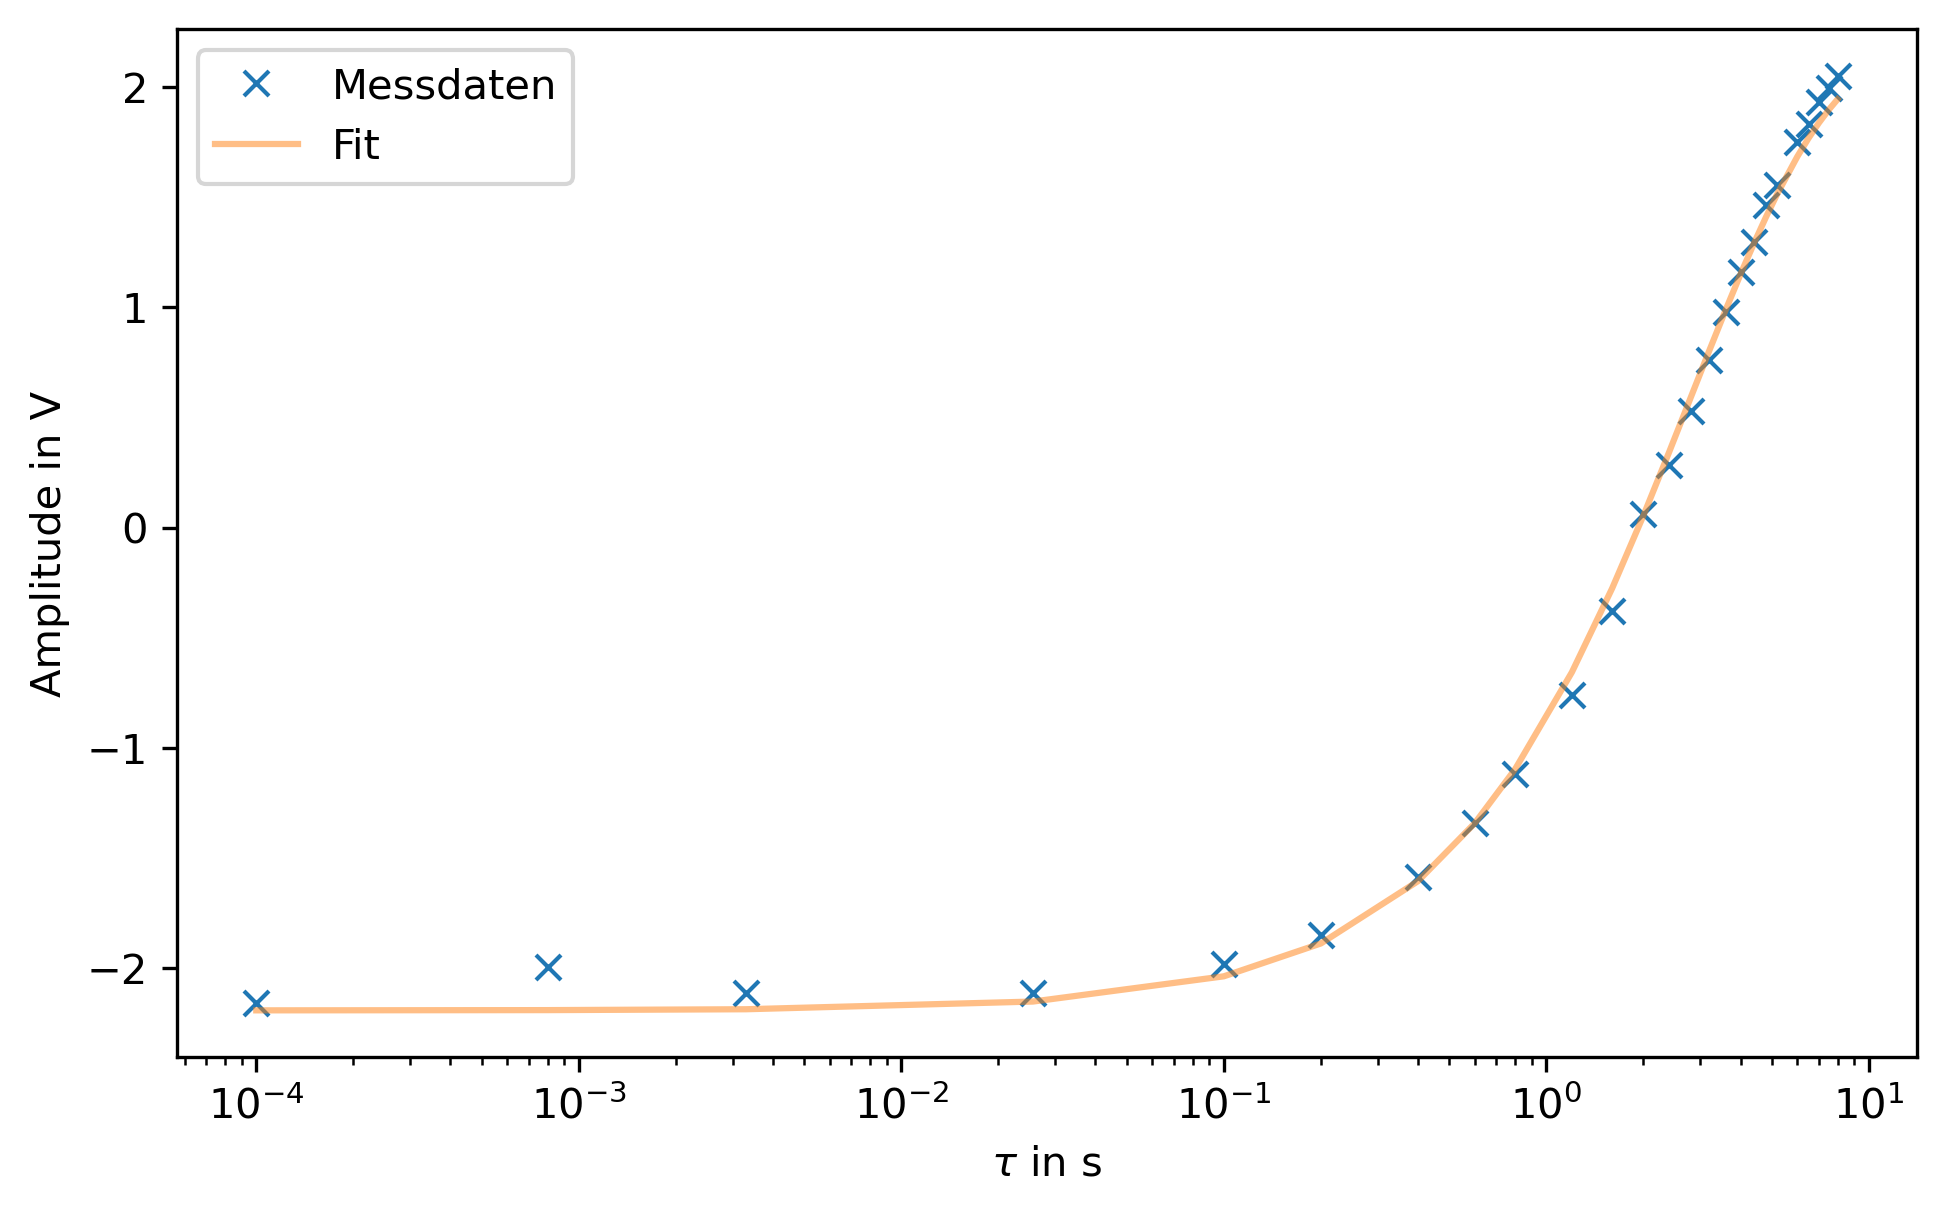

In [44]:
def A(tau,a,b):
    return a*(1-2*np.exp(-(tau/b)))

params1,cov = curve_fit(A,df1['tau'],df1['A'])
errors = np.sqrt(np.diag(cov))
params1_err = unp.uarray(params1,errors)

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df1['tau']
         ,df1['A']
         ,ls = 'None'
         ,marker = 'x'
         ,label = 'Messdaten'
        )
plt.plot(df1['tau']
         ,A(df1['tau'],*params1)
         ,alpha = 0.5
         ,label = 'Fit'
        )
plt.xscale('log')
plt.legend(loc = 'best')
plt.tight_layout()
#plt.savefig('plots/FID_amp_1.pdf',bbox_inches = "tight")
plt.ylabel('Amplitude in V')
plt.xlabel(r'$\tau$ in s')
None

In [8]:
params1_err

array([2.191172271638578+/-0.022567491091164304,
       2.784050799234282+/-0.040382098029313834], dtype=object)

# $T_2$ Bestimmung

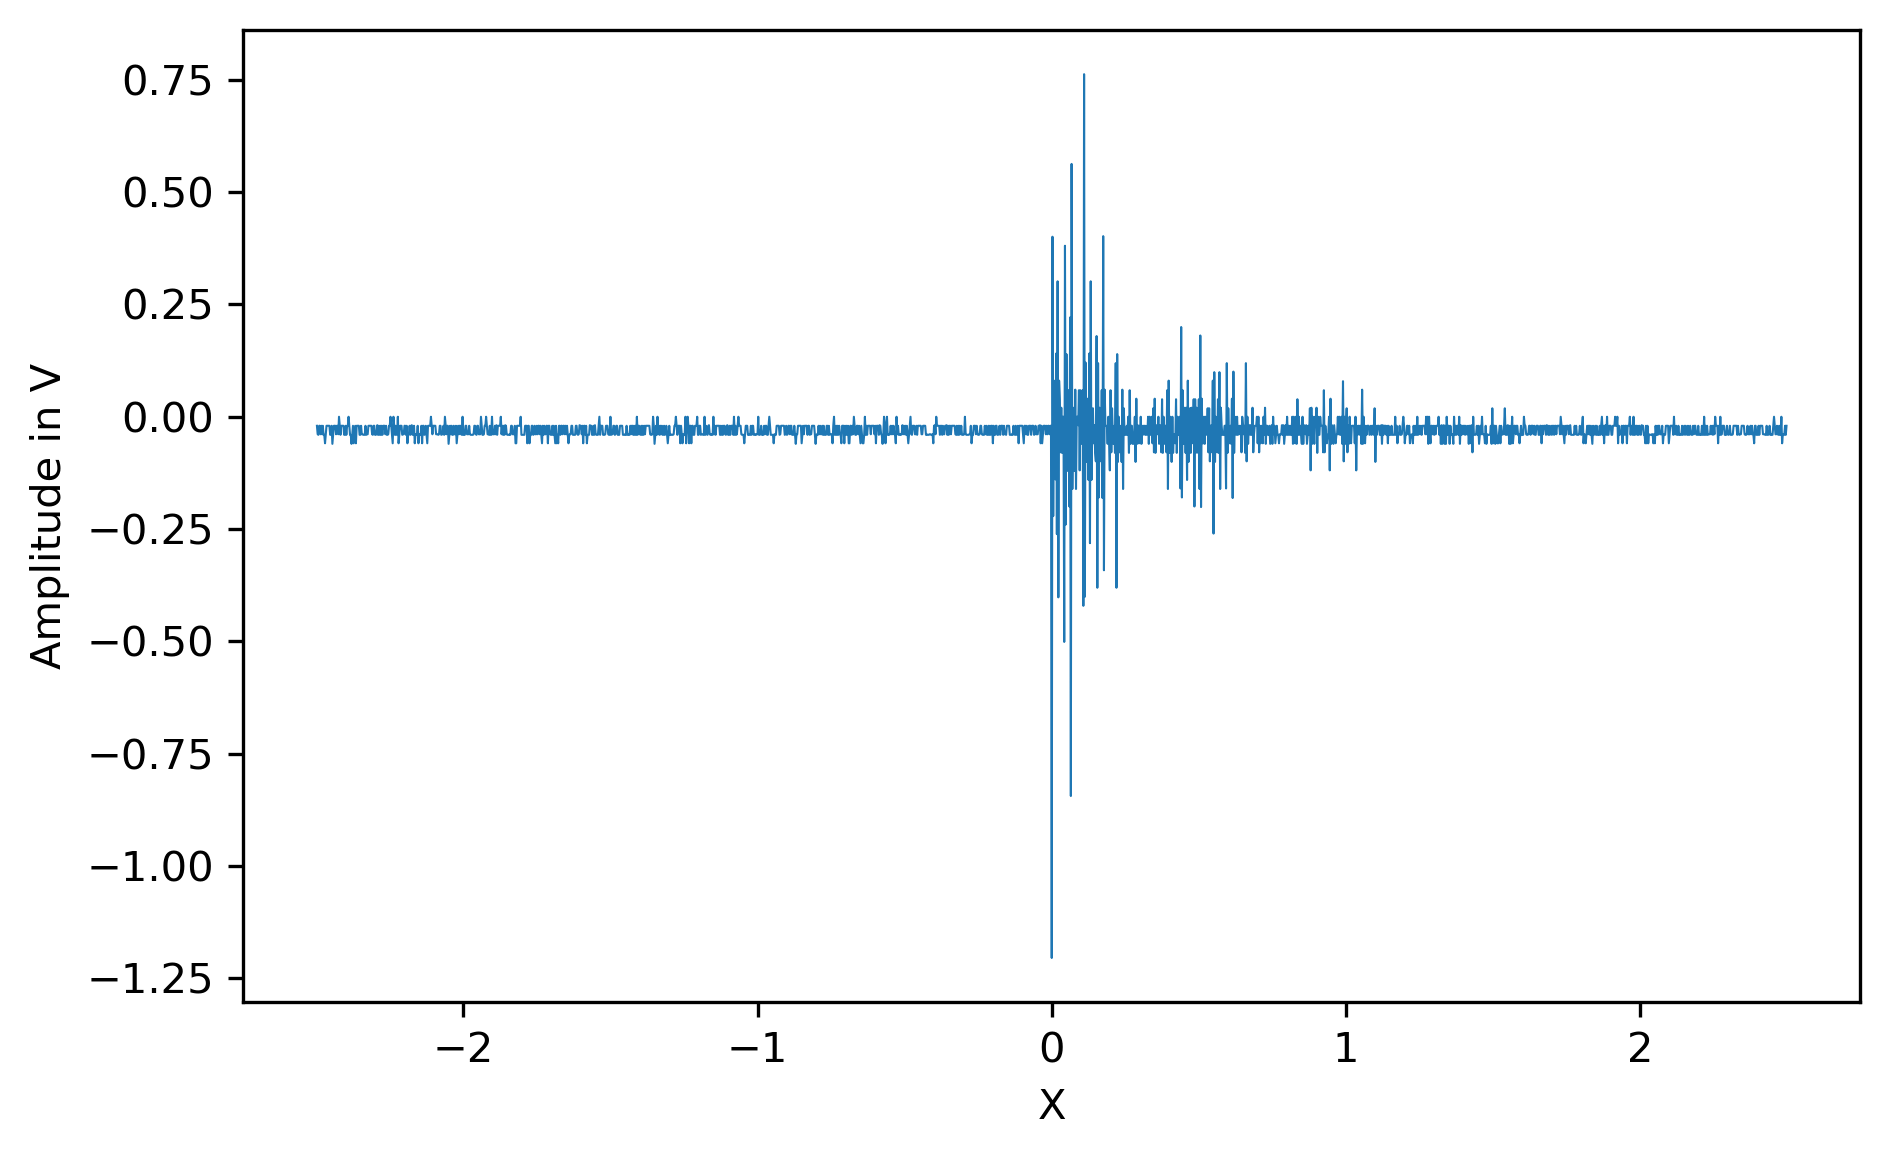

In [43]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df54['X']
         ,df54['U']
         ,lw = 0.5
         #,ls = 'None'
         #,marker = 'x'
         ,label = 'Messdaten'
        )
plt.ylabel('Amplitude in V')
plt.xlabel(r'X')
plt.tight_layout()

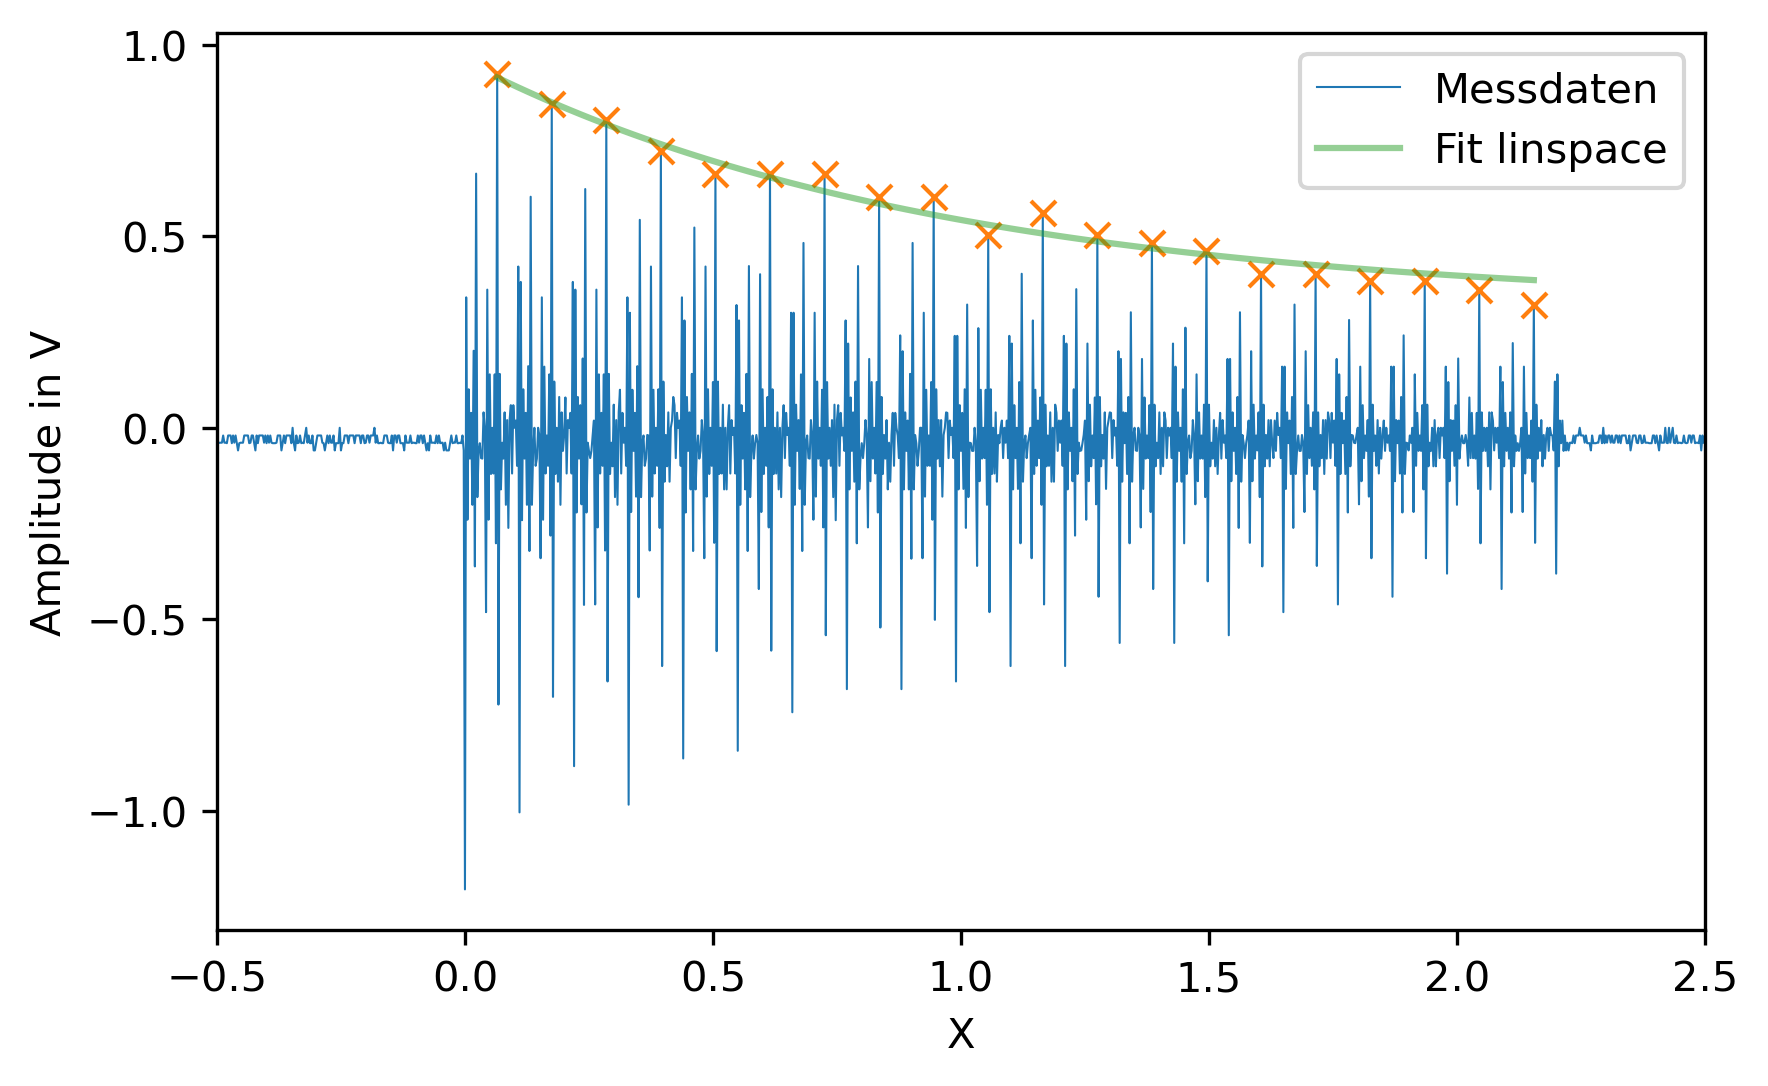

In [52]:
def A(tau,a,b):
    return a*(1+2*np.exp(-(tau/b)))

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df52['X']
         ,df52['U']
         ,lw = 0.5
         #,ls = 'None'
         #,marker = 'x'
         ,label = 'Messdaten'
        )
peaks, _ = find_peaks(df52['U']
                      ,distance= 35
                      ,threshold = 0.3)
plt.plot(df52['X'][peaks], df52['U'][peaks], "x")

params52,cov = curve_fit(A,df52['X'][peaks],df52['U'][peaks])
errors = np.sqrt(np.diag(cov))
params52_err = unp.uarray(params52,errors)
x = np.linspace(df52['X'][peaks[0]],df52['X'][peaks[-1]],100)
plt.plot(x
         ,A(x,*params52)
         ,alpha = 0.5
         ,label = 'Fit linspace'
        )
plt.legend()
plt.xlim(-0.5,2.5)
plt.ylabel('Amplitude in V')
plt.xlabel(r'X')
None

In [11]:
params52_err

array([0.3187314132707036+/-0.00886144511531248,
       0.954991059481842+/-0.08087693387368189], dtype=object)

In [12]:
T_2 = params52[1]

# $T_D$ Bestimmung

In [13]:

def A2(tau,a,b):
    return a*np.exp(-(2*0.011)/(T_2))*np.exp(-(tau**3)/(b))

def f(A):
    return np.log(A)-2*(0.011)/T_2

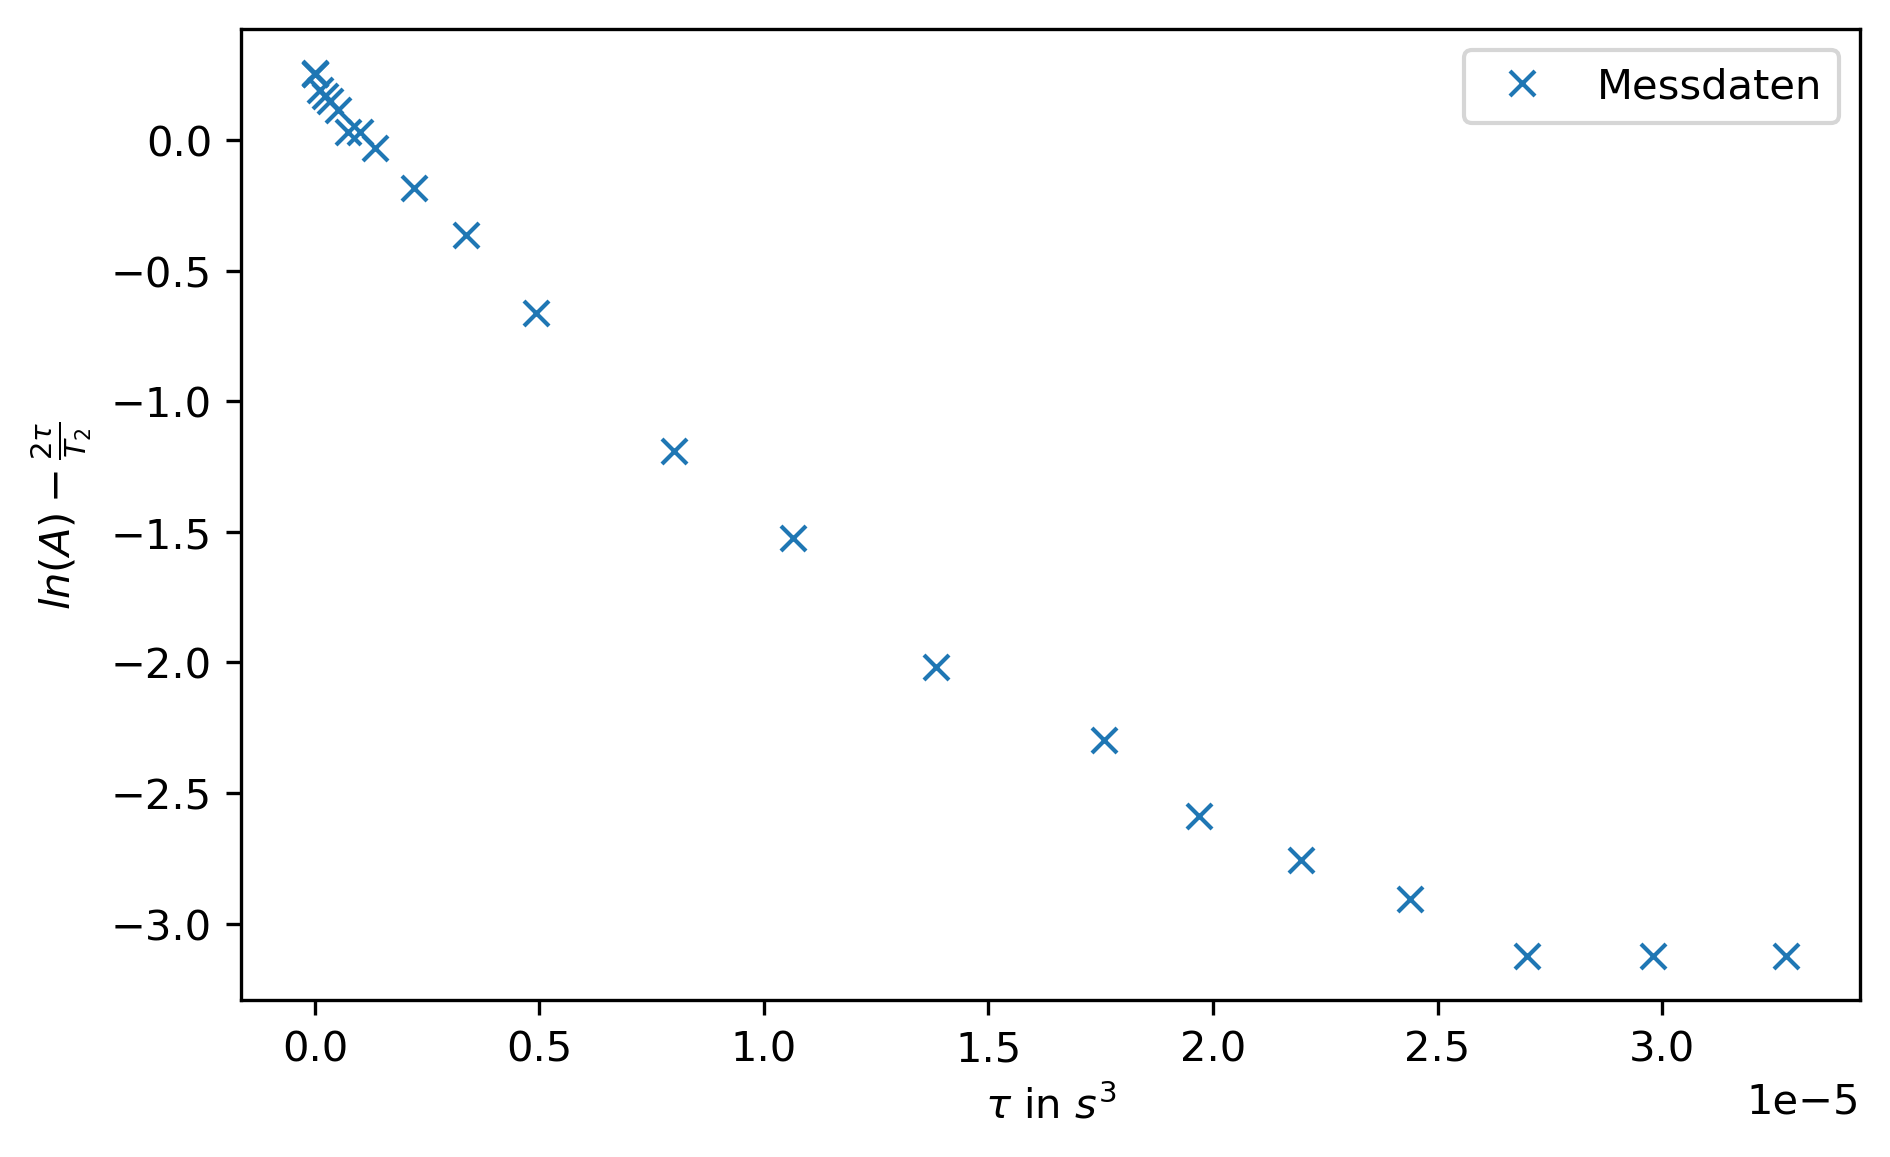

In [41]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df2['tau']**3
         ,f(df2['A'])
         ,ls = 'None'
         ,marker = 'x'
         ,label = 'Messdaten'
        )
plt.ylabel(r'$ln(A) - \frac{2\tau}{T_2} $')
plt.xlabel(r'$\tau$ in $s^3$')
plt.legend(loc = 'best')
plt.tight_layout()

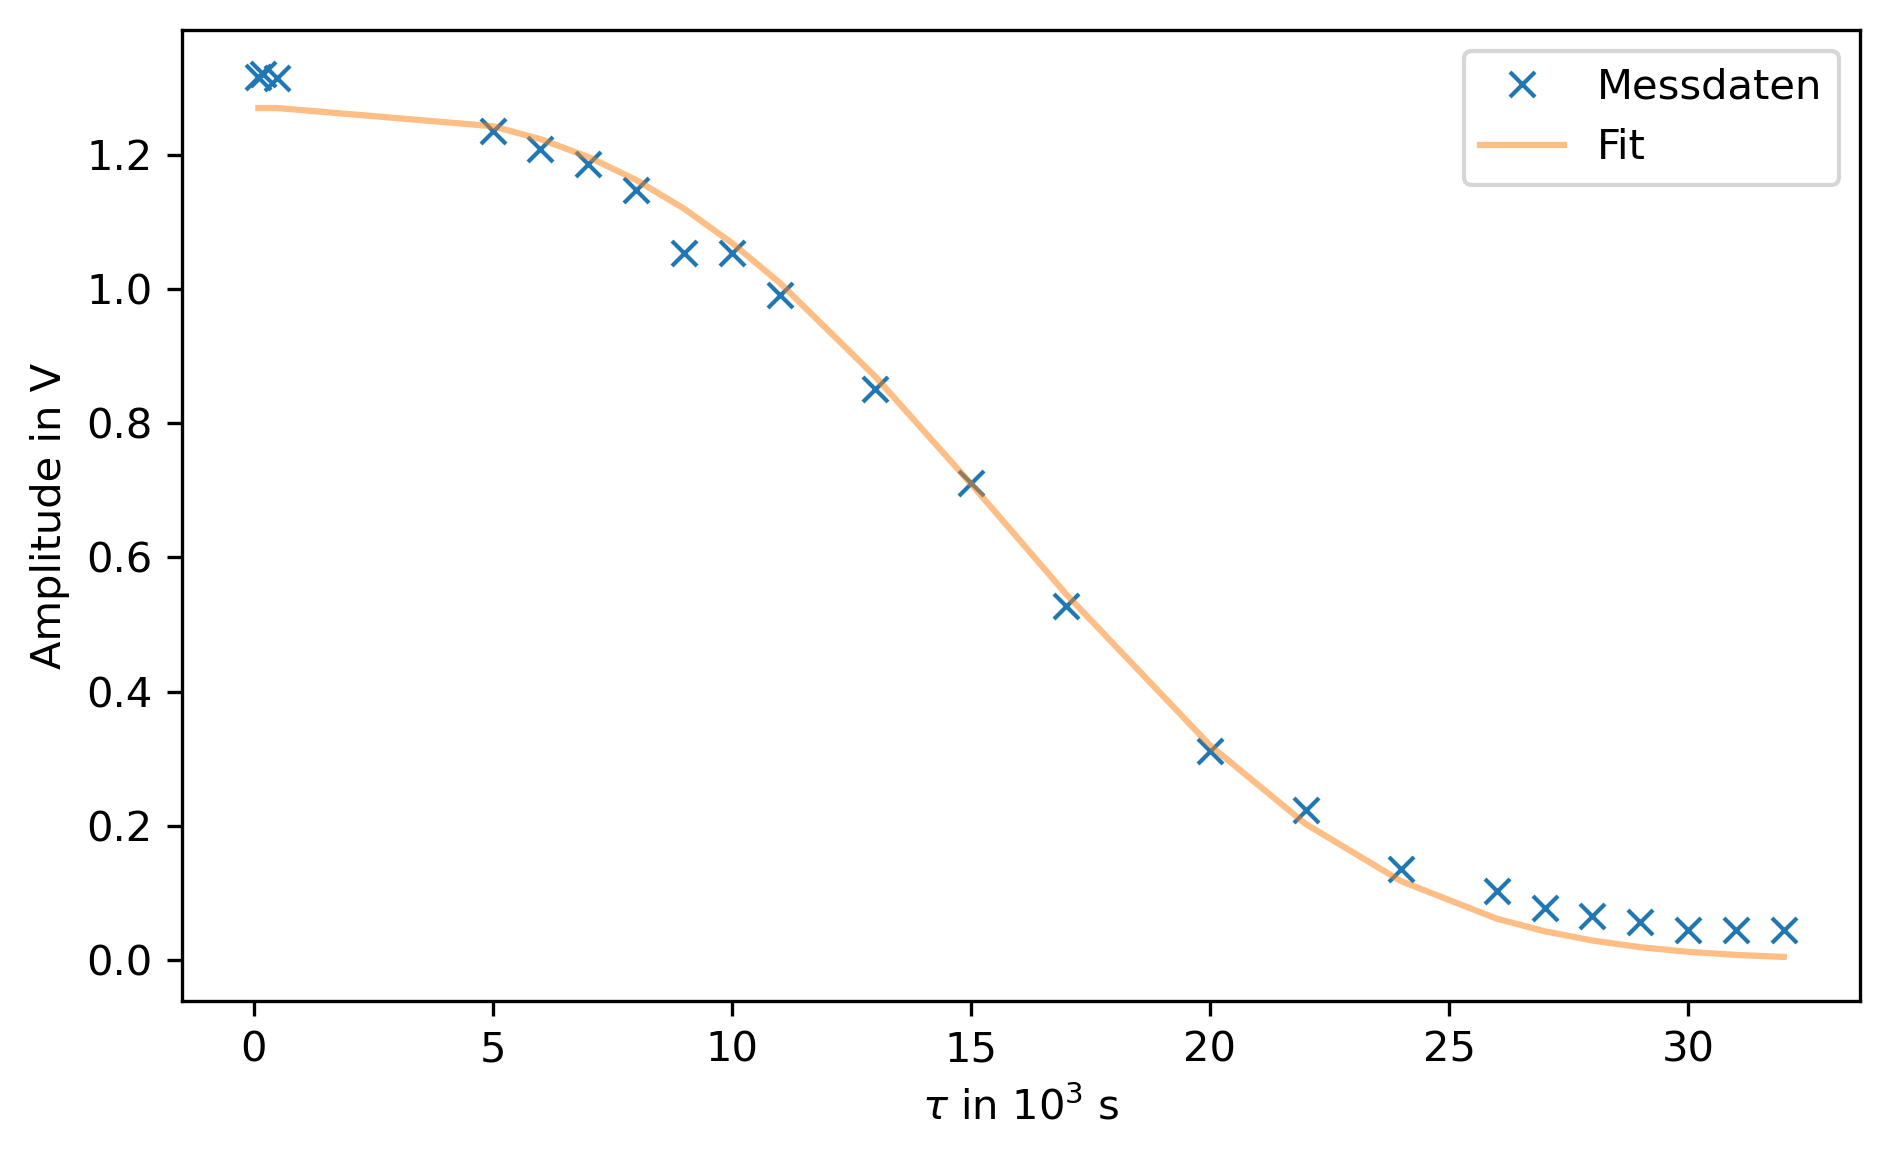

In [37]:
plt.figure(figsize=(6.4,3.96),dpi=300)

params2,cov = curve_fit(A2,df2['tau']*10**3,df2['A'])
errors = np.sqrt(np.diag(cov))
params2_err = unp.uarray(params2,errors)

plt.plot(df2['tau']*10**3
         ,df2['A']
         ,ls = 'None'
         ,marker = 'x'
         ,label = 'Messdaten'
        )
plt.plot(df2['tau']*10**3
         ,A2(df2['tau']*10**3,*params2)
         ,alpha = 0.5
         ,label = 'Fit'
        )
if False:
    x = np.linspace(0,0.03,100)
    plt.plot(x*10**3
             ,A2(x*10**3,1.409,1.784*10**3)
             ,alpha = 0.5
             ,label = 'Fit 2'
            )
plt.legend(loc = 'best')
plt.ylabel('Amplitude in V')
plt.xlabel(r'$\tau$ in $10^3$ s')
plt.tight_layout()

In [34]:
params2_err

array([1.2977244802743761+/-0.012399887283147532,
       5804.377882020189+/-209.5052280327785], dtype=object)

# Real und Imaginärteil

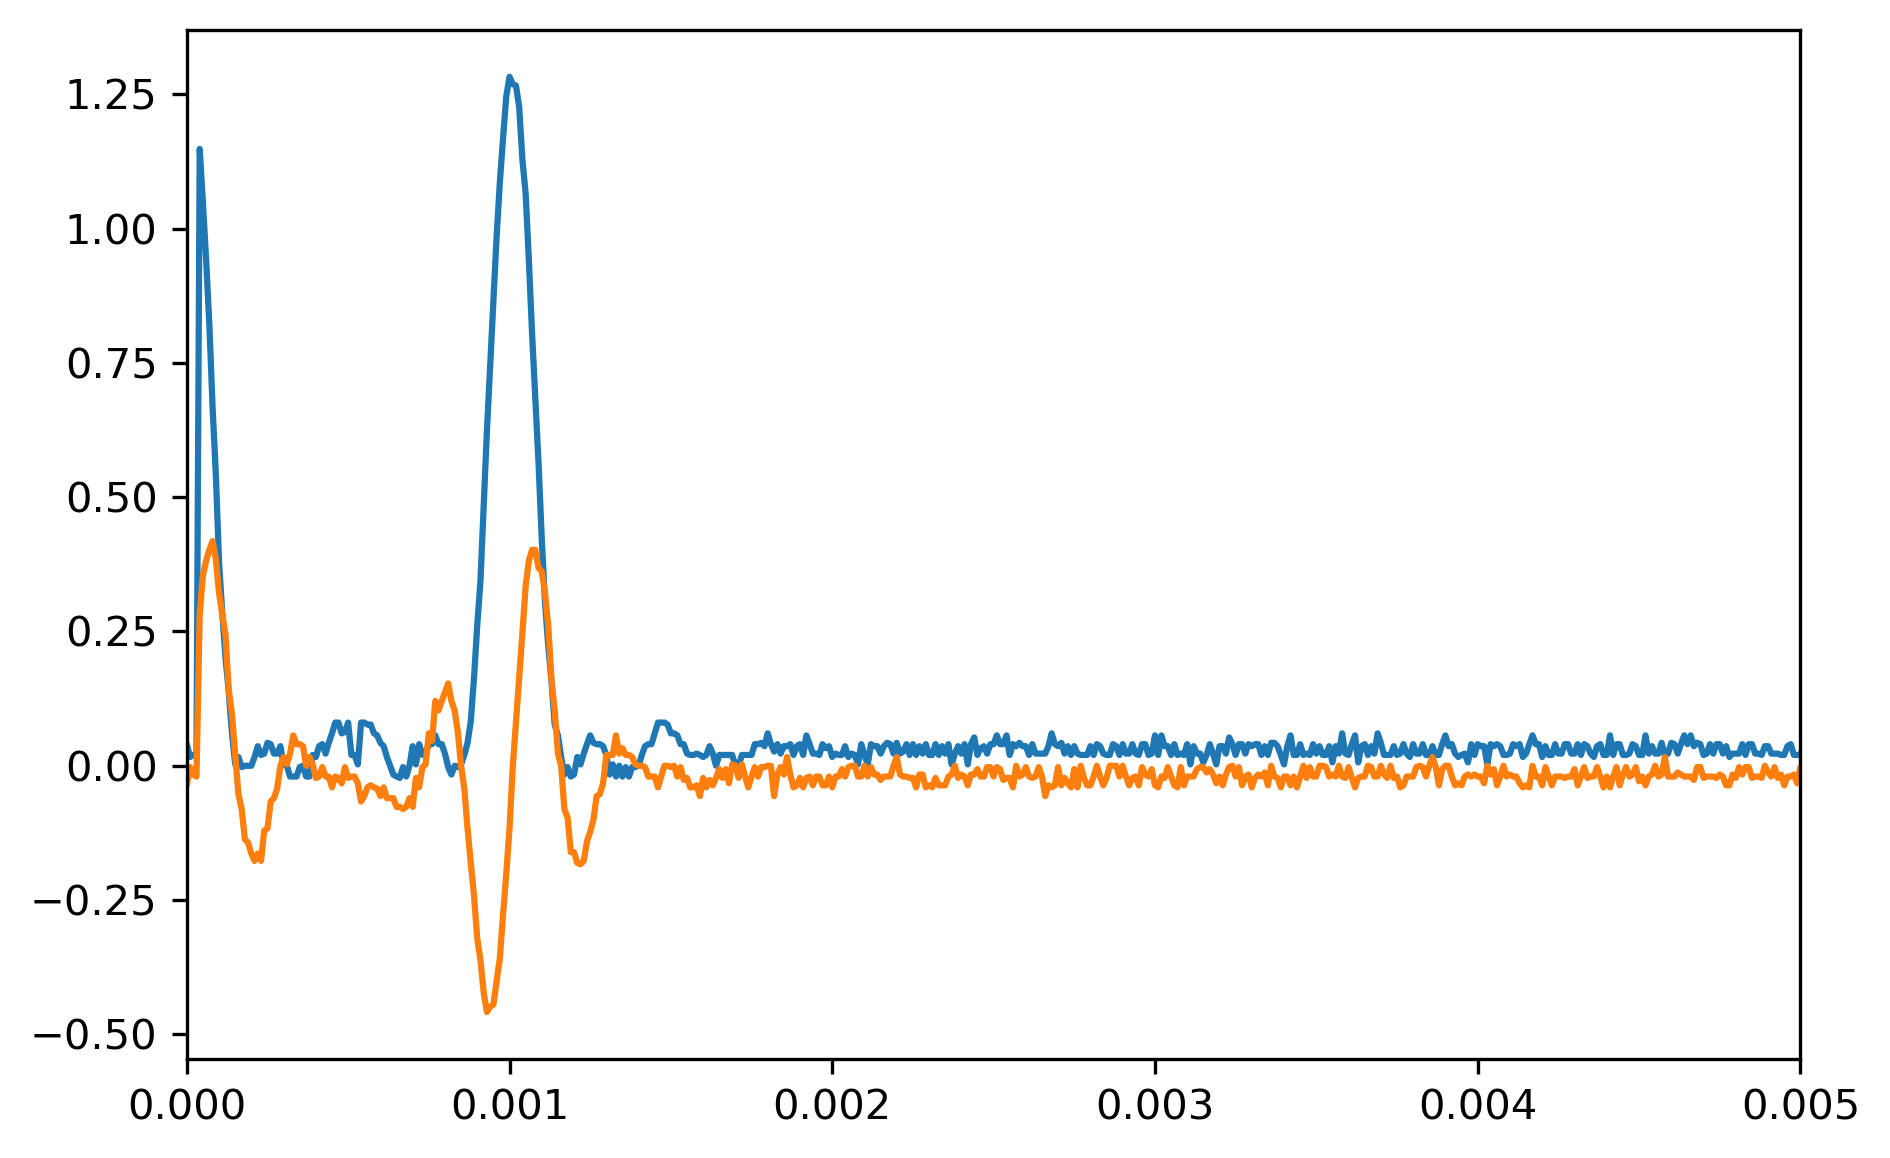

In [17]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df58['X']
         ,-df58['U']
         #,lw = 0.5
         #,ls = 'None'
         #,marker = 'x'
         ,label = 'Messdaten'
        )
plt.plot(df59['X']
         ,df59['U']
         #,lw = 0.5
         #,alpha = 0.5
         #,ls = 'None'
         #,marker = 'x'
         ,label = 'Imaginärteil'
        )
plt.xlim(0,0.005)
plt.ylabel('Amplitude in V')
plt.xlabel('Frequenz in Hz')
plt.tight_layout()

# Fouriertransformierte

In [18]:
#data = np.loadtxt("echo_gradient.csv", delimiter=",", skiprows=3, unpack= True)
times = np.array(df58['X'])
real = np.array(-df58['U'])
imag = np.array(df59['U'])

In [19]:
start = np.argmax(real)
times = times[start:]
real = real[start:]
imag = imag[start:]

In [20]:
phase = np.arctan2(imag[0], real[0])

In [21]:
compsignal = (real*np.cos(phase)+imag*np.sin(phase))+ \
             (-real*np.sin(phase)+imag*np.cos(phase))*1j

In [22]:
compsignal = compsignal - compsignal[-512:-1].mean()

In [23]:
compsignal[0] = compsignal[0]/2.0

In [24]:
apodisation = 100.0*2*np.pi
compsignal = compsignal*np.exp(-1.0/2.0*((times-times[0])*apodisation)**2)

In [25]:
fftdata = np.fft.fftshift(np.fft.fft(compsignal))

In [26]:
freqs = np.fft.fftshift(np.fft.fftfreq(len(compsignal), times[1]-times[0]))

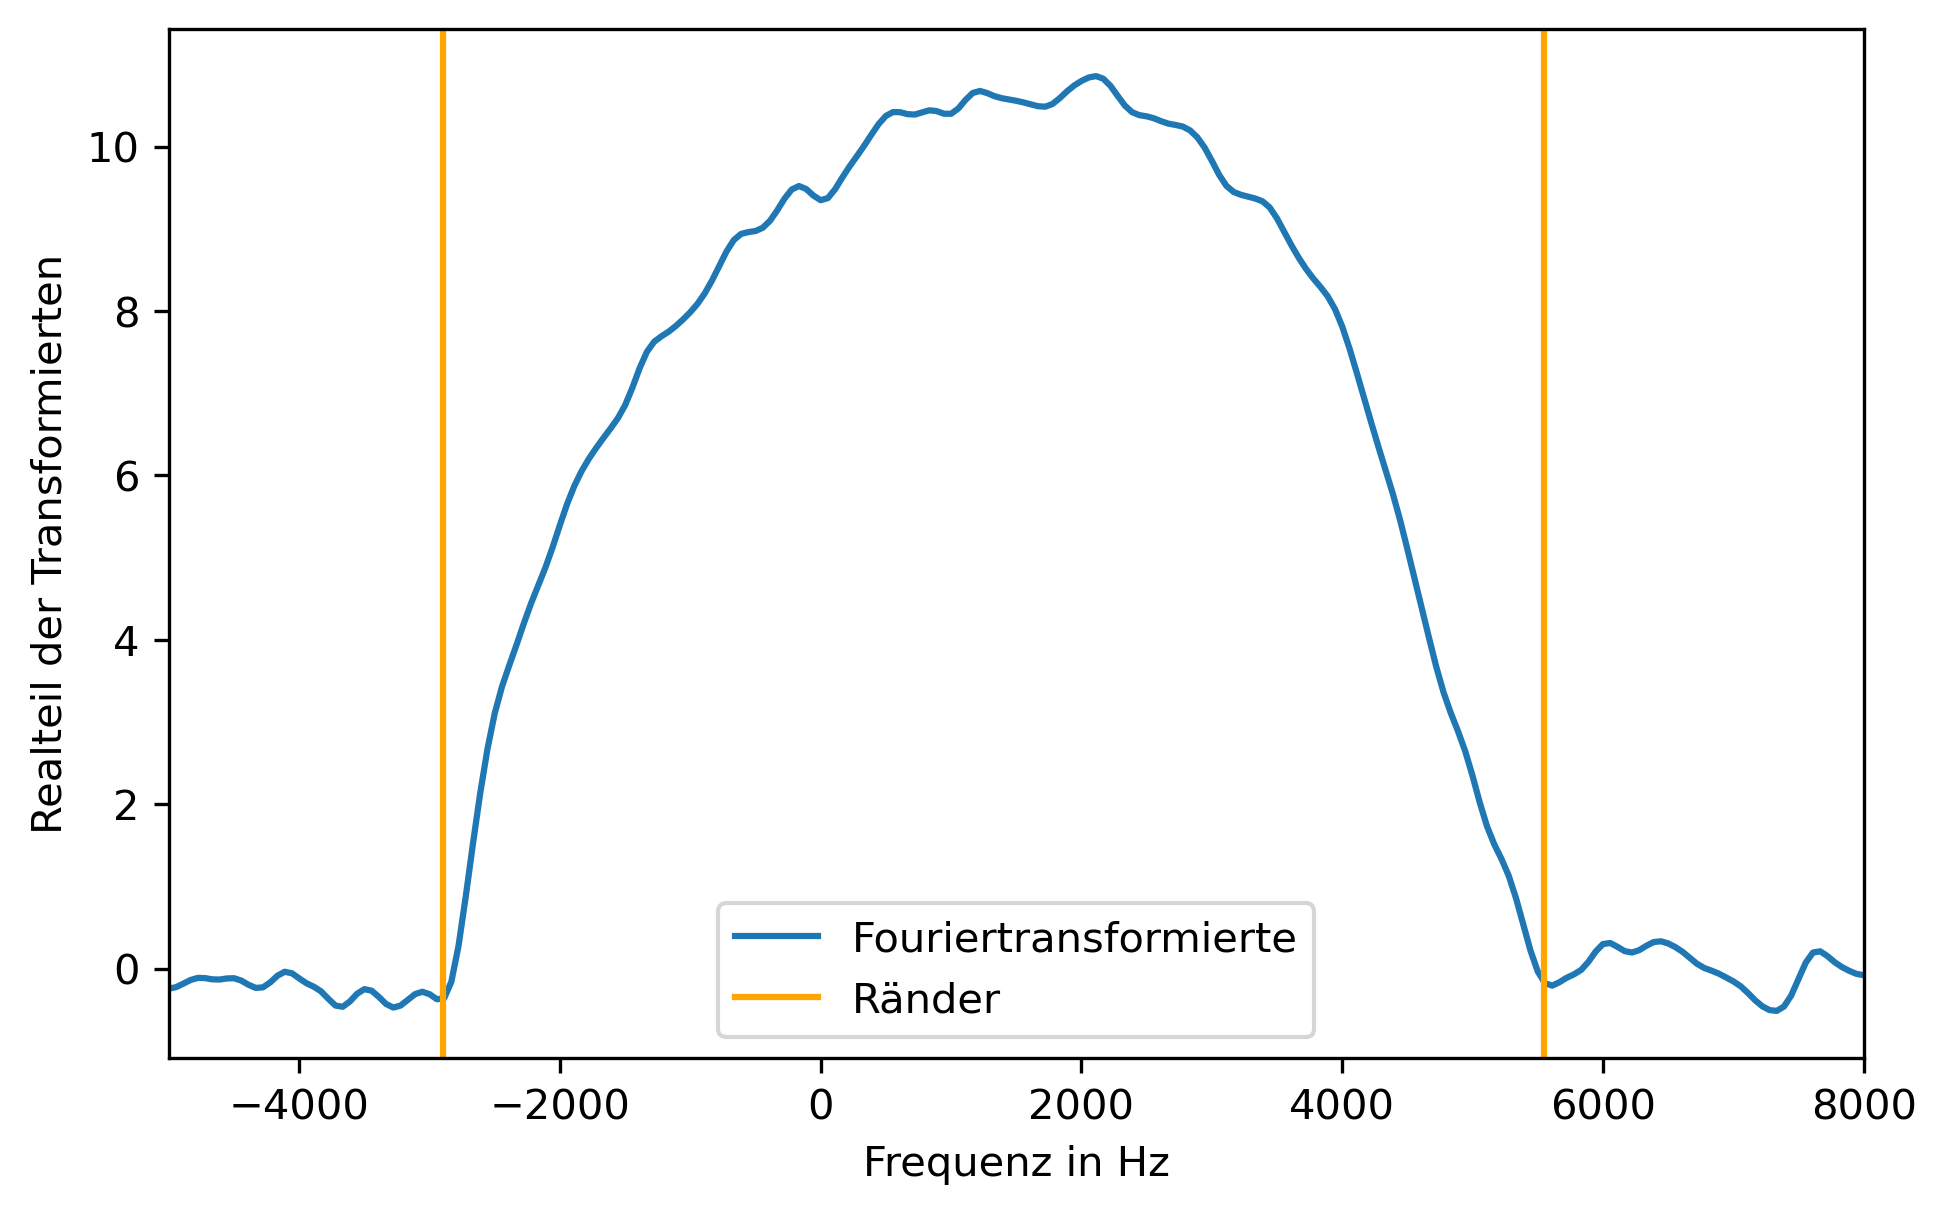

In [32]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(freqs
         ,np.real(fftdata)
         ,label = 'Fouriertransformierte')
plt.axvline(-2900
           ,color = 'orange'
           ,label = 'Ränder')
plt.axvline(5550
            ,color = 'orange')
plt.xlim(-5000,8000)
plt.tight_layout()
plt.ylabel('Realteil der Transformierten')
plt.xlabel('Frequenz in Hz')
plt.legend()
#plt.savefig("echo_gradient.pdf")